In [1]:
import plotly.offline as pyo
import plotly.graph_objs as go
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly as py
import sklearn as sk
import pandas as pd
import numpy as np
import scipy as sp
from scipy.stats import norm
df=pd.read_excel("dataR2 (1).xlsx")
pd.set_option('display.max_rows',None)
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


# Exploratory Data Analysis

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [3]:
#to get all necessary characteristics of data variables
df.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


In [4]:
#checking for nullvalues and replacing if necesssary
df.isnull()
df.fillna(0)

#there are no irrelevant columns in this filtered dataset, hence no dropping columns

#all column names are self-explanatory and well-named, hence no renaming required.

#drop duplicates if necessary
df = df.drop_duplicates()

In [5]:
#splitting patients and healthy controls into two dataframes
df_patients=df.loc[(df['Classification'] == 2) ]
df_controls=df.loc[(df['Classification'] == 1) ]

In [6]:
#Statistical Analysis of clinical features

#computing median for bio factor columns
agemedp=df_patients['Age'].median()
agemedc=df_controls['Age'].median()

BMImedp=df_patients['BMI'].median()
BMImedc=df_controls['BMI'].median()

Glucosemedp=df_patients['Glucose'].median()
Glucosemedc=df_controls['Glucose'].median()

Insulinmedp=df_patients['Insulin'].median()
Insulinmedc=df_controls['Insulin'].median()

HOMAmedp=df_patients['HOMA'].median()
HOMAmedc=df_controls['HOMA'].median()

Leptinmedp=df_patients['Leptin'].median()
Leptinmedc=df_controls['Leptin'].median()

Adipomedp=df_patients['Adiponectin'].median()
Adipomedc=df_controls['Adiponectin'].median()

Resistinmedp=df_patients['Resistin'].median()
Resistinmedc=df_controls['Resistin'].median()

MCPmedp=df_patients['MCP.1'].median()
MCPmedc=df_controls['MCP.1'].median()

data = {'Bio-factor':  ['Age', 'BMI','Glucose','Insulin','HOMA','Leptin','Adiponectin','Resistin','MCP.1'],
        'Patients': [agemedp, BMImedp,Glucosemedp,Insulinmedp,HOMAmedp,Leptinmedp,Adipomedp,Resistinmedp,MCPmedp],
         'Controls':[agemedc, BMImedc,Glucosemedc,Insulinmedc,HOMAmedc,Leptinmedc,Adipomedc,Resistinmedc,MCPmedc]
        }
df_median = pd.DataFrame(data,columns = ['Bio-factor','Patients','Controls'])
df_median

#significant differences are found for Glucose, Insulin, HOMA and Resistin,that are higher for the patients group
#Leptin, Adiponectin and MCP-1 values are found to be similar between the two groups.

,Bio-factor,Patients,Controls
0,Age,53.000000,65.000000
1,BMI,27.408027,27.694389
2,Glucose,98.500000,87.000000
3,Insulin,7.580000,5.483500
4,HOMA,2.052256,1.139683
5,Leptin,18.877650,21.494850
6,Adiponectin,8.446438,8.127775
7,Resistin,14.371825,8.929190
8,MCP.1,465.374000,471.322500


In [7]:
df1=df.loc[(df['Classification'] == 1)]
df2=df.loc[(df['Classification'] == 2)]

Text(0, 0.5, 'BMI')

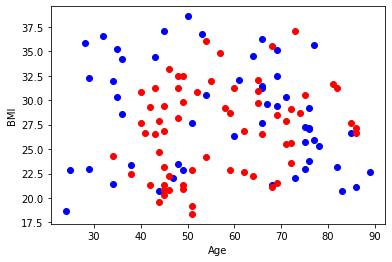

In [9]:
#Age VS BMI plot for both patients and controls
ax = plt.gca()
ax.scatter('Age', 'BMI',data=df1,color="b")
ax.scatter('Age', 'BMI', data=df2,color="r")
plt.xlabel('Age')
plt.ylabel('BMI')

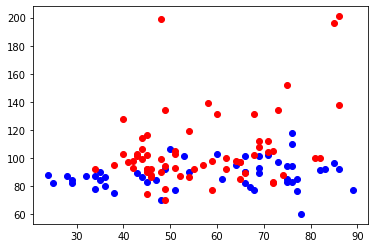

In [10]:
bx = plt.gca()
bx.scatter('Age', 'Glucose',data=df1,color="b")
bx.scatter('Age', 'Glucose', data=df2,color="r")

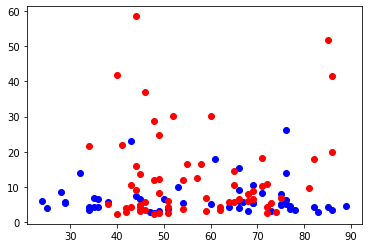

In [11]:
bx = plt.gca()
bx.scatter('Age', 'Insulin',data=df1,color="b")
bx.scatter('Age', 'Insulin', data=df2,color="r")

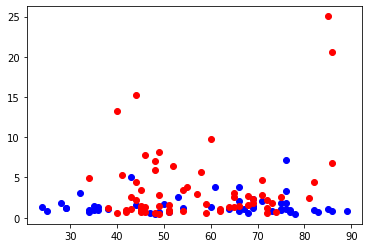

In [12]:
bx = plt.gca()
bx.scatter('Age', 'HOMA',data=df1,color="b")
bx.scatter('Age', 'HOMA', data=df2,color="r")

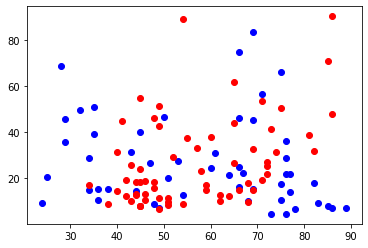

In [13]:
bx = plt.gca()
bx.scatter('Age', 'Leptin',data=df1,color="b")
bx.scatter('Age', 'Leptin', data=df2,color="r")

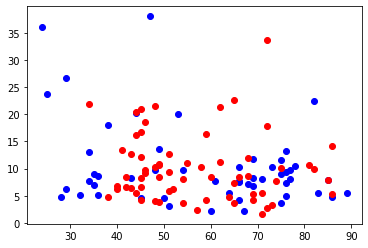

In [14]:
bx = plt.gca()
bx.scatter('Age', 'Adiponectin',data=df1,color="b")
bx.scatter('Age', 'Adiponectin', data=df2,color="r")

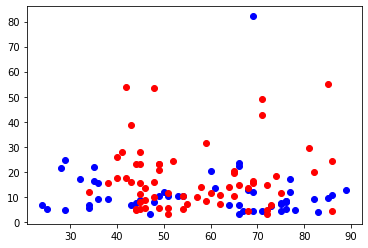

In [15]:
bx = plt.gca()
bx.scatter('Age', 'Resistin',data=df1,color="b")
bx.scatter('Age', 'Resistin', data=df2,color="r")

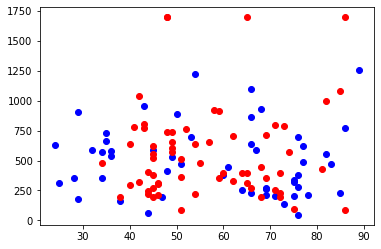

In [16]:
bx = plt.gca()
bx.scatter('Age', 'MCP.1',data=df1,color="b")
bx.scatter('Age', 'MCP.1', data=df2,color="r")

Text(0, 0.5, 'HOMA')

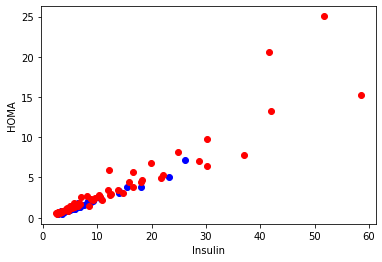

In [17]:
bx = plt.gca()
bx.scatter('Insulin', 'HOMA',data=df1,color="b")
bx.scatter('Insulin', 'HOMA', data=df2,color="r")
plt.xlabel('Insulin')
plt.ylabel('HOMA')

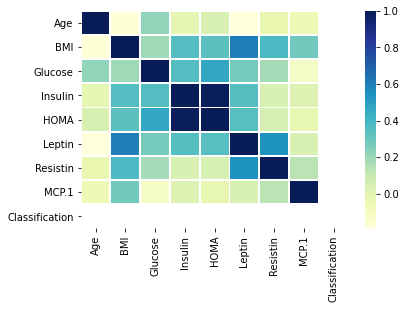

In [18]:
#Heatmap of all numeric data for healthy controls
numeric_cols=['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA','Leptin','Resistin','MCP.1','Classification']
sns.heatmap(df1[numeric_cols].corr(),fmt='.3g',cmap="YlGnBu",linewidths=1)
plt.show()

#HOMA and Insulin have a very high correlation as observed

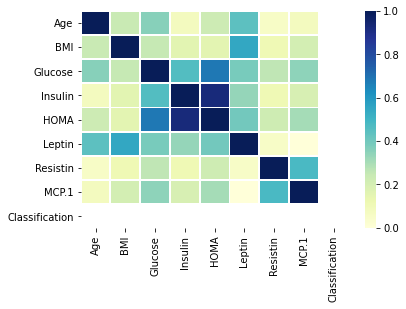

In [19]:
#Heatmap of all numeric data for patients
numeric_cols=['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA','Leptin','Resistin','MCP.1','Classification']
sns.heatmap(df2[numeric_cols].corr(),fmt='.3g',cmap="YlGnBu",linewidths=1)
plt.show()

Age, BMI, MCP-1 appear to be normally distributed. Glucose, Insulin, HOMA, Leptin, Adiponectin, and Resistin have a right skew distribution. If you look at HOMA and Insulin you will see a strong positive linear relationship in the scatter plot.

# Predictive Analysis

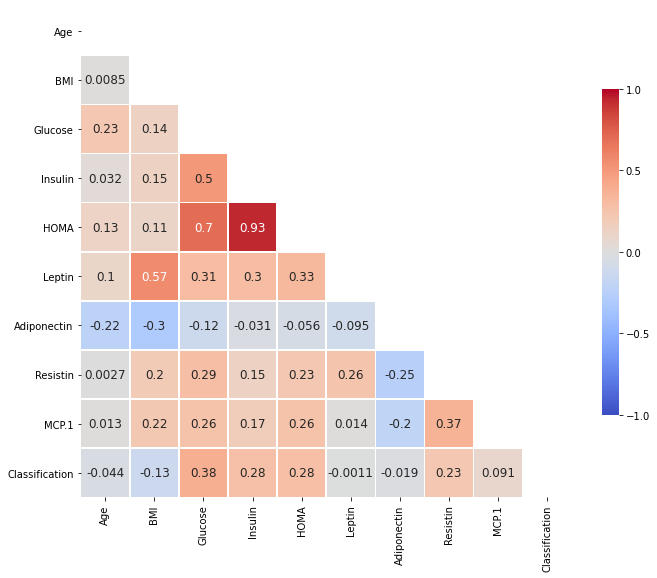

In [20]:
#make heatmap to visualize positive and negative linear relationship between bio-markers. 

corr_mat= df.corr()
mask = np.zeros_like(corr_mat, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
f, ax = plt.subplots(figsize=(11, 15)) 
heatmap = sns.heatmap(corr_mat, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})

ax.set_yticklabels(corr_mat.columns, rotation = 0)
ax.set_xticklabels(corr_mat.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

#Values close to 1.0- 0.93 and 0.7, show a strong positive linear relationship between the two variables while values close to -1.0 show strong negative relatinship.
#The heatmap indicates that all bio-markers are related to one another in some way and degree of correlation.



In [22]:
# We know that leptin is positive and hence to establish a relationship between leptin and the other bio-markers the following formulae were used.
#gamma fitted leptin mean
#µˆ =exp (-0.227+0.092 BMI+0.006 Glucose+0.010 Insulin+0.025 Adiponectin+0.016 Resistin–0.001 MCP1-0.001Adiponectin*Resistin)


e=2.718
df['gflm']= e**(-0.227+(0.092*df['BMI'])+(0.006*df['Glucose'])+(0.010*df['Insulin'])+(0.025*df['Adiponectin'])+(0.016*df['Resistin'])-(0.001*df['MCP.1'])-(0.001*df['Adiponectin']*df['Resistin']))

#gamma fitted leptin variance
#σˆ =exp(- 3.809+0.042 Age+0.153 Resistin–0.003 Age*Resistin) 

df['gflv']=e**(-3.809+(0.042*df['Age'])+(0.153*df['Resistin'])-(0.003*df['Age']*df['Resistin'])) 

df

#The derived values suggest direct association with BMI, Glucose, Insulin, Adiponectin, and Resistin. Inverse relationship exists between Leptin and MCP1

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification,gflm,gflv
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1,9.560467,0.178912
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1,7.166213,0.490135
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1,11.445881,0.292981
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1,4.936491,0.201111
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1,5.855267,0.270528
5,49,22.854458,92,3.226,0.732087,6.8317,13.679750,10.31760,530.410,1,9.925977,0.184719
6,89,22.700000,77,4.690,0.890787,6.9640,5.589865,12.93610,1256.083,1,4.008777,0.213193
7,76,23.800000,118,6.470,1.883201,4.3110,13.251320,5.10420,280.694,1,16.438539,0.367986
8,73,22.000000,97,3.350,0.801543,4.4700,10.358725,6.28445,136.855,1,13.063198,0.314223
9,75,23.000000,83,4.952,1.013839,17.1270,11.578990,7.09130,318.302,1,11.459173,0.310537


Heatmap Observations-
1.Glucose, Insulin, HOMA, and Resistin are all positively correlated with the classification variable at a level above 0.2
2.Insulin and HOMA have a very strong positive correlation value of 0.93
3.Glucose and HOMA have a moderately strong positive correlation value of 0.7
4.BMI and Leptin have a positive correlation value of 0.57
5.Glucose and Insulin have a positive correlation value of 0.5


In [45]:
#Train test split
df, class_label = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)

trainX, testX, trainY, testY = train_test_split(df, class_label, test_size=0.20, random_state=1)


# ROC Analysis for Random Forest Classifier

AUC: 0.96


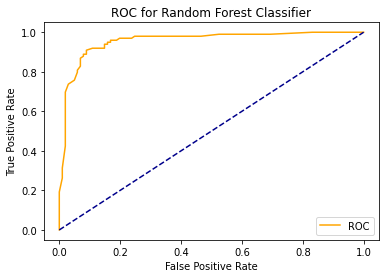

Accuracy on Training Set: 1.00
Accuracy on Test Set: 0.90


In [46]:
#To measure the performance of our model, we must find the Area under the curve (AUC) using ROC Analysis 
# roc curve and auc score
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for Random Forest Classifier')
    plt.legend()
    plt.show()
    


model = RandomForestClassifier()
model.fit(trainX, trainY)

probs = model.predict_proba(testX)

probs = probs[:, 1]

auc = roc_auc_score(testY, probs)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(testY, probs)

plot_roc_curve(fpr, tpr)

rfc = RandomForestClassifier(class_weight='balanced')
rfc.fit(trainX, trainY)
print('Accuracy on Training Set: {:.2f}'
     .format(rfc.score(trainX, trainY)))
print('Accuracy on Test Set: {:.2f}'
     .format(rfc.score(testX, testY)))

# Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.model_selection import cross_validate
import multiprocessing
from numpy import mean, std
logreg= LogisticRegression(multi_class='multinomial', solver='lbfgs', C=0.25)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)  #model evaluation procedure
cpus = multiprocessing.cpu_count()
n_scores =cross_validate(logreg, df, class_label, scoring=['precision_macro', 'recall_macro','accuracy'], cv=cv, n_jobs=cpus)
fit_time= mean(n_scores['fit_time'])
score_time= mean(n_scores['score_time'])
precision= mean(n_scores['test_precision_macro'])
recall= mean(n_scores['test_recall_macro'])
accuracy= mean(n_scores['test_accuracy'])
F1 = 2 * (precision * recall) / (precision + recall)

print(accuracy)
print(precision)
print(recall)
print(F1)

0.8875
0.8909882988240443
0.8873871548619447
0.8891840807518924


In [42]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score 

logreg.fit(trainX, trainY)
logreg_prediction = logreg.predict(testX)
print("\nClassification Report : \n", classification_report(logreg_prediction,testY))  
print("\nConfusion Matrix : \n", confusion_matrix(testY, logreg_prediction))


Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.92      0.90        97
           1       0.92      0.88      0.90       103

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200


Confusion Matrix : 
 [[89 12]
 [ 8 91]]


# Linear-discrimant Analysis 

In [66]:
# evaluate a lda model on the dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# define dataset
df, class_label = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)

trainX, testX, trainY, testY = train_test_split(df, class_label, test_size=0.33, random_state=1)
# define model
lda = LinearDiscriminantAnalysis()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores1 = cross_val_score(model, trainX, trainY, scoring='accuracy', cv=cv, n_jobs=-1)
scores2 = cross_val_score(model, testX, testY, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores1), std(scores1)))
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores2), std(scores2)))

Mean Accuracy: 0.870 (0.044)
Mean Accuracy: 0.891 (0.054)


In [56]:
from sklearn.neighbors import KNeighborsClassifier

acc=[]
sse=[]

for i in range(3,24,2):
    knn = KNeighborsClassifier(n_neighbors = i, weights='distance')
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)
    n_scores =cross_validate(knn, df, class_label, scoring=['accuracy'], cv=cv, n_jobs=cpus)
    acc.append(mean(n_scores['test_accuracy']))

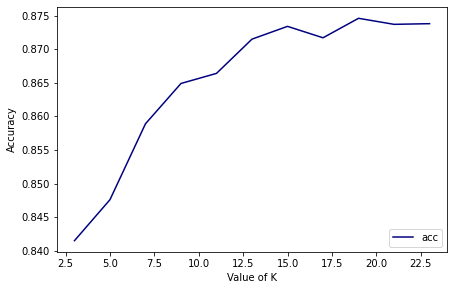

In [57]:
plt.figure(figsize= (7,4.5))
plt.plot([3,5,7,9,11,13,15,17,19,21,23], acc, color='navy', label='acc')
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.legend(loc="lower right")
plt.show()

In [63]:
knn = KNeighborsClassifier(n_neighbors = 20, weights='distance')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)
n_scores =cross_validate(knn, df, class_label, scoring=['precision_macro', 'recall_macro','accuracy'], cv=cv, n_jobs=cpus)
fit_time= mean(n_scores['fit_time'])
score_time= mean(n_scores['score_time'])
precision= mean(n_scores['test_precision_macro'])
recall= mean(n_scores['test_recall_macro'])
accuracy= mean(n_scores['test_accuracy'])
F1 = 2 * (precision * recall) / (precision + recall)
print(accuracy)

0.8764000000000002


In [65]:
knn.fit(trainX,trainY)
knn_pred = knn.predict(testX)
print(knn_pred)
print("\nConfusion Matrix : \n", confusion_matrix(testY, knn_pred))

[0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0
 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0
 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1
 0 1 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0
 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1
 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0
 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1
 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0
 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 1]

Confusion Matrix : 
 [[124  30]
 [  7 169]]


In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
dtc= DecisionTreeClassifier()
dtc = dtc.fit(trainX,trainY)
y_pred = dtc.predict(testX)

print("Accuracy:",metrics.accuracy_score(testY, y_pred))


Accuracy: 0.8242424242424242
